In [8]:
# based on the simulation for 3600s
# the energy consumption will increase with the increasement of bitrate
# in this script, it will research the energy consumption for different bitrate in terms of simulation time
import matplotlib.pyplot as plt
import json
import itertools
import numpy as np
import pandas as pd

In [9]:
duration = [5704,10716,29380,156900]
times = [600,1200,1800]
result = {}
loops = 10

In [10]:
for time in times:
    for d in duration:
        title = '{}&{}'.format(time,d)
        result[title] = {'before_joined':[],
                         'after_joined':[],
                         'total':[]
                        }
        for loop in range(loops):
            with open('./examples/mesh/results/energy_consumption_with_time/energy-with-time-{}s-{}-{}/stats.json'.format(d,time,loop),'r') as f:
                data = json.load(f)
                charge_consumed_total = data["part 1"]["global-stats for this duration"]["current-consumed"][0]["mean"]
                charge_consumed_joined = data["part 1"]["global-stats for this duration"]["current-consumed-when-joined"][0]["mean"]
                charge_consumed_before_joining = charge_consumed_total - charge_consumed_joined
                result[title]["before_joined"].append(charge_consumed_before_joining)
                result[title]["after_joined"].append(charge_consumed_joined)
                result[title]["total"].append(charge_consumed_total)

In [11]:
json_str = json.dumps(result)
with open('./examples/mesh/single_model_result/energy_with_simulation_time_stats.json','w') as f:
    f.write(json_str)

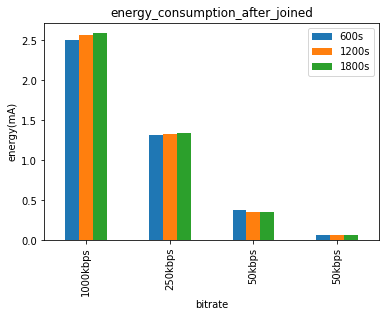

In [12]:
# bar plot
# energy consumption after joining
data_after_joined = [       
        ['1000kbps',
         np.mean(result['600&5704']['after_joined']),
         np.mean(result['1200&5704']['after_joined']),
         np.mean(result['1800&5704']['after_joined']),
        ],
        ['250kbps',
         np.mean(result['600&10716']['after_joined']),
         np.mean(result['1200&10716']['after_joined']),
         np.mean(result['1800&10716']['after_joined']),
        ],
         ['50kbps',
         np.mean(result['600&29380']['after_joined']),
         np.mean(result['1200&29380']['after_joined']),
         np.mean(result['1800&29380']['after_joined']),
        ],
        ['50kbps',
         np.mean(result['600&156900']['after_joined']),
         np.mean(result['1200&156900']['after_joined']),
         np.mean(result['1800&156900']['after_joined']),
        ],
]
df = pd.DataFrame(data_after_joined,columns=['bitrate','600s','1200s','1800s'])
energy_after_joined = df.plot(x='bitrate',y=['600s','1200s','1800s'],kind='bar',title="energy_consumption_after_joined",xlabel='bitrate',ylabel='energy(mA)',legend=True)
#PDR_fig.set_xlabel('bitrate')
energy_after_joined  = energy_after_joined .get_figure()
energy_after_joined.savefig('./examples/mesh/single_model_result/energy_with_time_after_joined.pdf',bbox_inches = 'tight')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()

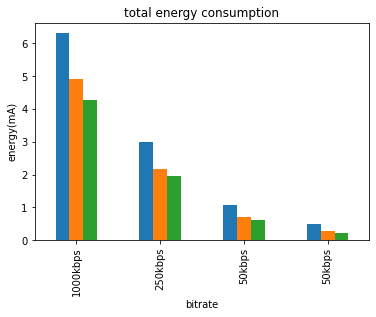

In [13]:
# bar plot
# energy consumption total
data_after_joined = [       
        ['1000kbps',
         np.mean(result['600&5704']["total"]),
         np.mean(result['1200&5704']["total"]),
         np.mean(result['1800&5704']["total"]),
        ],
        ['250kbps',
         np.mean(result['600&10716']["total"]),
         np.mean(result['1200&10716']["total"]),
         np.mean(result['1800&10716']["total"]),
        ],
         ['50kbps',
         np.mean(result['600&29380']["total"]),
         np.mean(result['1200&29380']["total"]),
         np.mean(result['1800&29380']["total"]),
        ],
        ['50kbps',
         np.mean(result['600&156900']["total"]),
         np.mean(result['1200&156900']["total"]),
         np.mean(result['1800&156900']["total"]),
        ],
]
df = pd.DataFrame(data_after_joined,columns=['bitrate','600','1200','1800'])
energy_after_joined = df.plot(x='bitrate',y=['600','1200','1800'],kind='bar',title="total energy consumption",xlabel='bitrate',ylabel='energy(mA)',legend=False)
#PDR_fig.set_xlabel('bitrate')
energy_after_joined  = energy_after_joined .get_figure()
energy_after_joined.savefig('./examples/mesh/single_model_result/energy_with_time_after_joined.pdf',bbox_inches = 'tight')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()

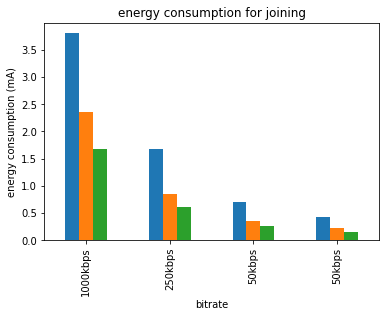

In [14]:
# bar plot
# energy consumption for joining
data_after_joined = [       
        ['1000kbps',
         np.mean(result['600&5704']['before_joined']),
         np.mean(result['1200&5704']['before_joined']),
         np.mean(result['1800&5704']['before_joined']),
        ],
        ['250kbps',
         np.mean(result['600&10716']['before_joined']),
         np.mean(result['1200&10716']['before_joined']),
         np.mean(result['1800&10716']['before_joined']),
        ],
         ['50kbps',
         np.mean(result['600&29380']['before_joined']),
         np.mean(result['1200&29380']['before_joined']),
         np.mean(result['1800&29380']['before_joined']),
        ],
        ['50kbps',
         np.mean(result['600&156900']['before_joined']),
         np.mean(result['1200&156900']['before_joined']),
         np.mean(result['1800&156900']['before_joined']),
        ],
]
df = pd.DataFrame(data_after_joined,columns=['bitrate','600','1200','1800'])
energy_after_joined = df.plot(x='bitrate',y=['600','1200','1800'],kind='bar',title="energy consumption for joining",xlabel='bitrate',ylabel='energy consumption (mA)',legend=False)
#PDR_fig.set_xlabel('bitrate')
energy_after_joined  = energy_after_joined .get_figure()
energy_after_joined.savefig('./examples/mesh/single_model_result/energy_with_time_after_joined.pdf',bbox_inches = 'tight')
#plt.grid(linestyle="--", alpha=0.3)
plt.show()